<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "used_car_price_analysis.csv")

In [4]:
import pandas as pd

# Specify the file path where the CSV file is located
file_path = "used_car_price_analysis.csv"

# Read the CSV file into a pandas data frame
df = pd.read_csv(file_path)

# Print the first 5 rows of the dataframe
print(df.head(5))

<ipython-input-4-b6f3047350a4>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [5]:
import pandas as pd


# 1. Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

# 2. Replace missing values with mean value of the column
for col in columns_with_missing_values:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# 3. Delete duplicate entries
df.drop_duplicates(inplace=True)

print(df)

Columns with missing values: ['tax']


<ipython-input-5-e165dff62702>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0       Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1        Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2        Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3       Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4       Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17961    B-MAX  2017       Manual    16700   Petrol  150.0  47.1         1.4   
17962    B-MAX  2014       Manual    40700   Petrol   30.0  57.7         1.0   
17963    Focus  2015       Manual     7010   Diesel   20.0  67.3         1.6   
17964       KA  2018       Manual     5007   Petrol  145.0  57.7         1.2   
17965    Focus  2015       Manual     5007   Petrol   22.0  57.7         1.0   

       price  
0      12000  
1      14

---


# Test Environment


In [6]:
import pandas as pd


# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation between numerical columns and price
correlations = df[numerical_cols].corrwith(df['price']).sort_values(ascending=False)

# Identify top 5 attributes with highest correlation
top_attributes = correlations.index[:5].tolist()
print("Top 5 attributes with highest correlation with price:")
print(top_attributes)

Top 5 attributes with highest correlation with price:
['price', 'year', 'engineSize', 'tax', 'mpg']


In [7]:
import pandas as pd


# Count the number of entries with each unique value of the fuelType attribute
fuelType_counts = df['fuelType'].value_counts()

print("Number of entries with each unique value of the fuelType attribute:")
print(fuelType_counts)

Number of entries with each unique value of the fuelType attribute:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


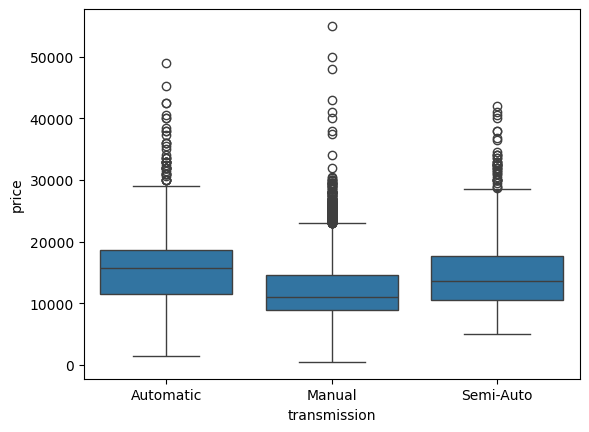

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.boxplot(x='transmission', y='price', data=df)
plt.show()

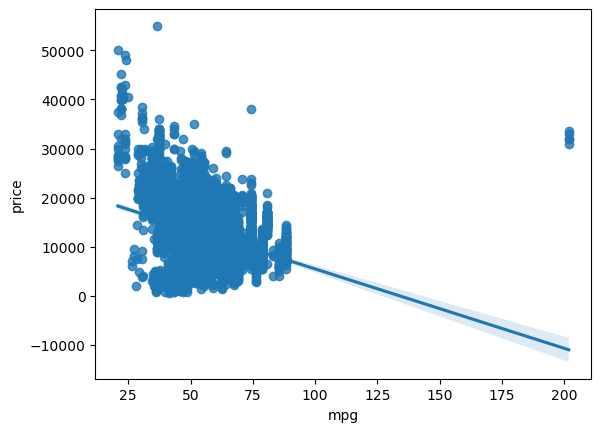

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a regression plot using Seaborn
sns.regplot(x='mpg', y='price', data=df)
plt.show()

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have a pandas DataFrame called 'data' with columns 'price' and 'mpg'
# Split the data into target variable (y) and source variable (X)
X = df[['mpg']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)
print("R^2 value:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R^2 value: 0.1504343741072478
Mean Squared Error: 19049855.140110757


In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have a pandas DataFrame called 'data' with columns 'price', 'year', 'mileage', 'tax', 'mpg', and 'engineSize'
# Split the data into target variable (y) and source variables (X)
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)
print("R^2 value:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R^2 value: 0.6917125923771564
Mean Squared Error: 6912744.910746688


In [12]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Assume 'df' is your pandas data frame

# Define the source variables and target variable
source_variables = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_variable = 'price'

# Split the data into source and target variables
X = df[source_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 value: {r2}")
print(f"Mean Squared Error: {mse}")

R^2 value: 0.12122807147174242
Mean Squared Error: 19704749.61491952


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'df' is your pandas data frame

# Define the source variables and target variable
source_variables = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_variable = 'price'

# Split the data into source and target variables
X = df[source_variables]
y = df[target_variable]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE for Ridge Regression: {mse}")
print(f"R^2 for Ridge Regression: {r2}")

MSE for Ridge Regression: 6912725.801054926
R^2 for Ridge Regression: 0.6917134446113138


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'df' is your pandas data frame

# Define the source variables and target variable
source_variables = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_variable = 'price'

# Split the data into source and target variables
X = df[source_variables]
y = df[target_variable]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit a Ridge regression model with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test_poly)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE for Ridge Regression with Polynomial Features: {mse}")
print(f"R^2 for Ridge Regression with Polynomial Features: {r2}")


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE for Ridge Regression with Polynomial Features: 7326174.516559619
R^2 for Ridge Regression with Polynomial Features: 0.6732748888228912


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'df' is your pandas data frame

# Define the source variables and target variable
source_variables = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_variable = 'price'

# Split the data into source and target variables
X = df[source_variables]
y = df[target_variable]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a Ridge regression model
ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10]}  # Set of values for the parameter alpha
ridge_grid = GridSearchCV(ridge, parameters, cv=5)
ridge_grid.fit(X_train_poly, y_train)

# Make predictions
y_pred = ridge_grid.predict(X_test_poly)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE for Ridge Regression with Polynomial Features and Grid Search: {mse}")
print(f"R^2 for Ridge Regression with Polynomial Features and Grid Search: {r2}")


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.70036e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.76253e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.75058e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.74584e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.64902e-24): res

MSE for Ridge Regression with Polynomial Features and Grid Search: 7326174.516559619
R^2 for Ridge Regression with Polynomial Features and Grid Search: 0.6732748888228912


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
